**ILLUSTRATION OF MARKET SEGMENTATION ANALYSIS USING McDONALD'S DATASET**

For this case study, imagine that you are McDonald’s, and you would want to know if consumer segments exist that have a distinctly different image of McDonald’s. Understanding such systematic differences of brand perceptions by market segments informs which market segments to focus on, and what messages to communicate to them.
In this case, we want to understand the key drivers of the negative perception, and modify them.


**A.1 Step 1: Deciding (not) to Segment**

McDonald’s can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald’s can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.

**A.2 Step 2: Specifying the Ideal Target Segment**

Knock-out Criteria for Market Segment Attractiveness:

* Homogeneous: Segment members are similar in a key characteristic.
* Distinct: Segment members differ substantially from other segments in a key characteristic.
* Size: Segment is large enough to justify a customized marketing mix.
* Alignment with McDonald’s Strengths: Segment is open to eating at fast food restaurants.
* Identifiable: There is a clear way to spot segment members among other consumers.
* Reachable: Channels of communication and distribution exist to target segment members specifically.

Segment Attractiveness Criteria:

* Positive Perception: Segment has a positive view of McDonald’s.
* Eating Habits: Segment frequently eats out and likes fast food.
* Existing Market Share: Focus on segments where McDonald’s holds a high market share.
* Understanding Non-Consumers: Learn about segments not fond of McDonald’s, understand their perceptions, and attempt to modify them.

Specific Attractiveness Criteria from Data Set:

* Liking McDonald’s: Favourable brand image of McDonald’s.
* Frequent Visits: Frequency of eating at McDonald’s.

**A.3 Step 3: Collecting Data**

The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study con- ducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).

In [10]:
# A.4 Step 4: Exploring Data

import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

# Display column names
print(mcdonalds.columns)

# Display dimensions of the dataset
print(mcdonalds.shape)

# Display the first 3 rows of the dataset
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [11]:
# Select the first 11 columns
MD_x = mcdonalds.iloc[:, :11]

# Convert the 'Yes'/'No' to binary (1 for 'Yes', 0 for 'No')
MD_x = (MD_x == 'Yes').astype(int)

# Calculate the column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Another way of exploring data initially is to compute a **principal components analysis**, and create a perceptual map.

In [12]:
# Perform PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print summary of PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", np.round(explained_variance, 2))

# Print PCA components
components = pca.components_
print("PCA Components:")
print(np.round(components, 1))

Explained Variance Ratio: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
PCA Components:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

Explained Variance Ratio:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


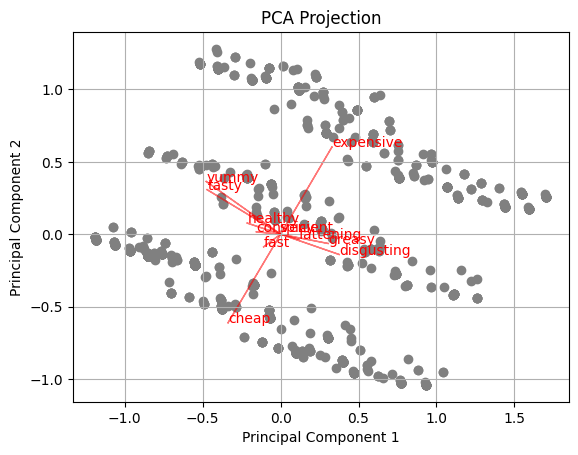

In [4]:
# Explained variance ratio
import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(np.round(explained_variance, 1))

# Plot PCA projections
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)

# Get the loadings (principal component axes)
loadings = pca.components_.T

# Plot each loading as an arrow
for i, loading in enumerate(loadings):
    plt.arrow(0, 0, loading[0], loading[1], color='red', alpha=0.5)
    plt.text(loading[0], loading[1], mcdonalds.columns[i], color='red')

plt.show()

The loadings indicate how the original variables are combined to form principal components. Loadings guide the interpretation of principal components. In our example, the two segmentation variables with the highest loadings (in absolute terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this principal component captures the price dimension.

**A.5 Step 5: Extracting Segments**



In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical data to binary numeric
segmentation_vars = mcdonalds.iloc[:, 0:11]
segmentation_vars_binary = (segmentation_vars == 'Yes').astype(int)

In [7]:
# Function to perform k-means clustering and calculate stability
def kmeans_clustering(data, num_clusters, num_repeats, num_bootstrap):
    kmeans_models = []
    stability_scores = []

    for k in num_clusters:
        kmeans = KMeans(n_clusters=k, n_init=num_repeats, random_state=1234)
        kmeans.fit(data)
        kmeans_models.append(kmeans)

        bootstrap_scores = []
        for _ in range(num_bootstrap):
            sample_data = resample(data, random_state=1234)
            kmeans_sample = KMeans(n_clusters=k, n_init=num_repeats, random_state=1234)
            kmeans_sample.fit(sample_data)
            score = adjusted_rand_score(kmeans.labels_, kmeans_sample.labels_)
            bootstrap_scores.append(score)

        stability_scores.append(np.mean(bootstrap_scores))

    return kmeans_models, stability_scores

In [55]:
from sklearn.preprocessing import LabelEncoder

# Drop non-numeric columns or preprocess them
numeric_data = mcdonalds.select_dtypes(include=['int', 'float'])

# Handle categorical variables using label encoding
label_encoder = LabelEncoder()
categorical_cols = mcdonalds.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mcdonalds[col] = label_encoder.fit_transform(mcdonalds[col])

# Perform k-means clustering on preprocessed data
kmeans = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans.fit(numeric_data)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


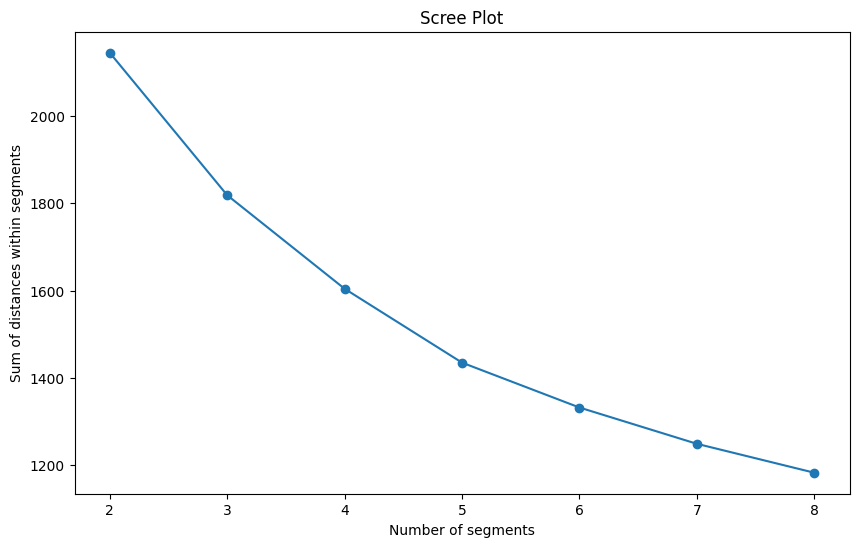

In [52]:
# Plot the scree plot
wcss = [model.inertia_ for model in kmeans_models]
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Sum of distances within segments')
plt.title('Scree Plot')
plt.show()


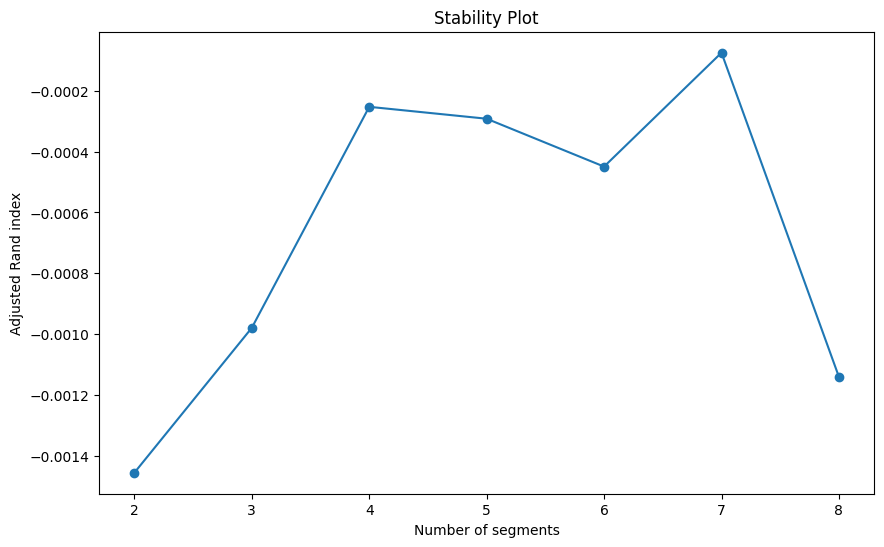

In [15]:
# Plot the stability plot
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, stability_scores, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Stability Plot')
plt.show()


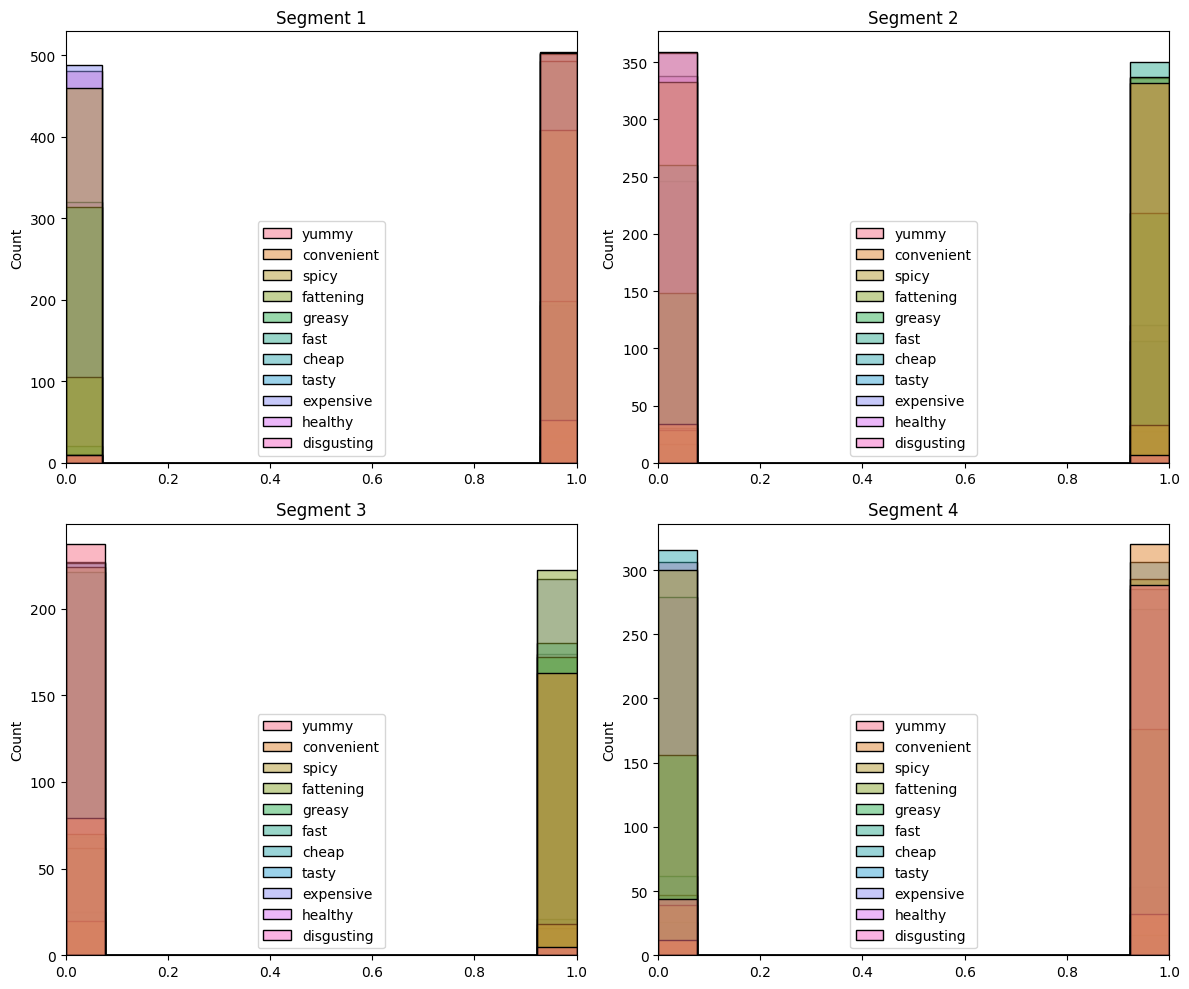

In [16]:
# Select the four-segment solution
best_k = 4
best_model = kmeans_models[best_k - 2]  # k=4 is the third element in num_clusters (index 2)

# Inspecting the structure of the four-segment solution
segmentation_labels = best_model.labels_
segmentation_labels_series = pd.Series(segmentation_labels)

# Plot histogram for each segment
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i in range(best_k):
    sns.histplot(segmentation_vars_binary[segmentation_labels_series == i], kde=False, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Segment {i + 1}')
    axes[i//2, i%2].set_xlim(0, 1)

plt.tight_layout()
plt.show()


In [51]:
# Calculate and plot segment-level stability within solutions
def segment_level_stability(data, model, num_bootstrap):
    segment_stability = []

    for i in range(model.n_clusters):
        stability_scores = []
        for _ in range(num_bootstrap):
            sample_data = resample(data, random_state=1234)
            kmeans_sample = KMeans(n_clusters=model.n_clusters, n_init=num_repeats, random_state=1234)
            kmeans_sample.fit(sample_data)
            score = adjusted_rand_score(model.labels_ == i, kmeans_sample.labels_ == i)
            stability_scores.append(score)
        segment_stability.append(np.mean(stability_scores))

    return segment_stability

segment_stability = segment_level_stability(segmentation_vars_binary, best_model, num_bootstrap)

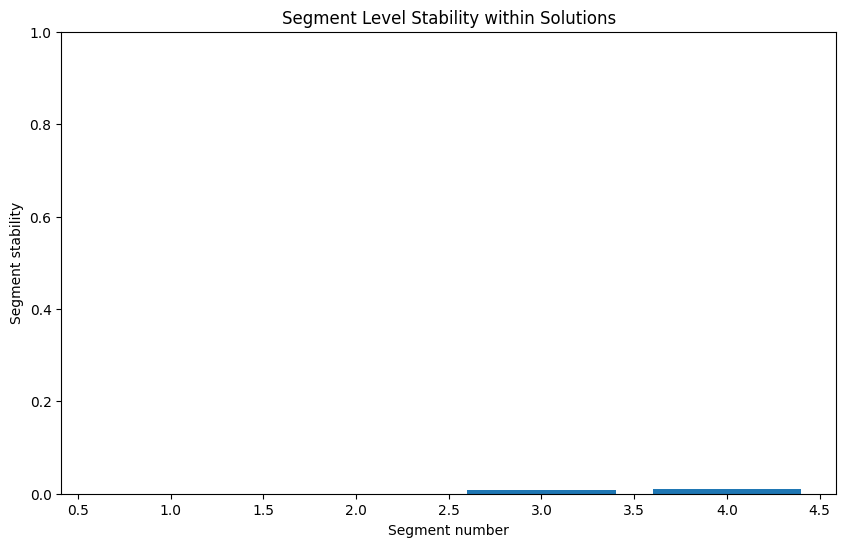

In [53]:
# Plot segment-level stability
plt.figure(figsize=(10, 6))
plt.bar(range(1, best_k + 1), segment_stability)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.ylim(0, 1)
plt.title('Segment Level Stability within Solutions')
plt.show()


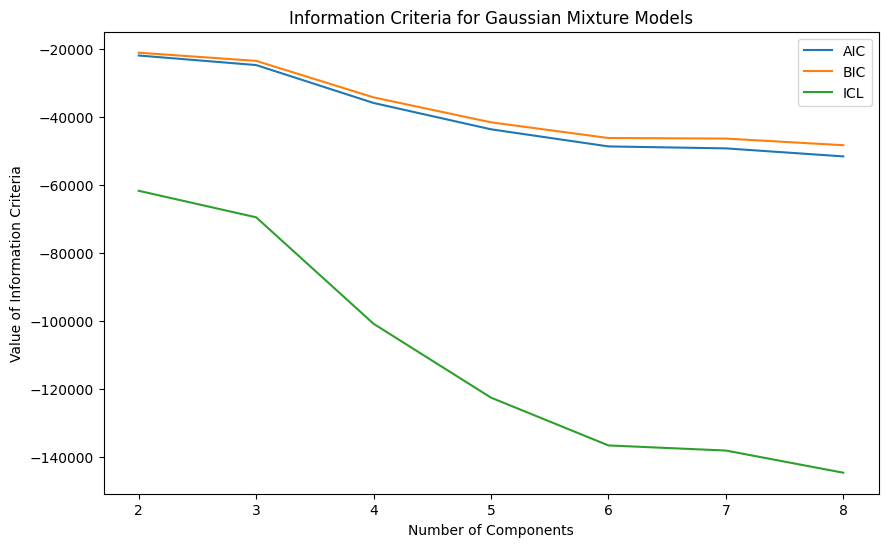

Contingency Table (MD_k4 vs. MD_m4):
col_0    0   1   2    3
row_0                  
0      449   1  42   21
1      288  36   5   37
2        0  87   2  153
3        0   8  77  247
Contingency Table (MD_k4 vs. MD_m4a):
col_0    0   1   2    3
row_0                  
0      449   1  42   21
1      288  36   5   37
2        0  87   2  153
3        0   8  77  247
Log Likelihood (MD_m4a): 12.580946387710531
Log Likelihood (MD_m4): 12.580946387710531


In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Trying different numbers of components for GaussianMixture (k=2 to k=8)
bic_scores = []
aic_scores = []
icl_scores = []

for k in range(2, 9):
    gm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gm.fit(MD_x)
    bic = gm.bic(MD_x)
    aic = gm.aic(MD_x)
    log_likelihood = gm.score_samples(MD_x).sum()
    # Approximate ICL by penalizing BIC with additional penalty term (here -log_likelihood)
    icl = bic - 0.5 * np.log(len(MD_x)) * log_likelihood
    bic_scores.append(bic)
    aic_scores.append(aic)
    icl_scores.append(icl)

# Plot the information criteria
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), aic_scores, label='AIC')
plt.plot(range(2, 9), bic_scores, label='BIC')
plt.plot(range(2, 9), icl_scores, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.title('Information Criteria for Gaussian Mixture Models')
plt.show()

# Selecting the model with 4 components (as in the original R code)
MD_m4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
MD_m4.fit(MD_x)
MD_m4_clusters = MD_m4.predict(MD_x)

# KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
MD_k4_clusters = kmeans.fit_predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(MD_k4_clusters, MD_m4_clusters)
print("Contingency Table (MD_k4 vs. MD_m4):")
print(contingency_table)

# Fit the GaussianMixture again using k-means clusters as initial clusters
MD_m4a = GaussianMixture(n_components=4, n_init=10, random_state=1234)
MD_m4a.fit(MD_x, y=MD_k4_clusters)
MD_m4a_clusters = MD_m4a.predict(MD_x)

# Create another contingency table
contingency_table_a = pd.crosstab(MD_k4_clusters, MD_m4a_clusters)
print("Contingency Table (MD_k4 vs. MD_m4a):")
print(contingency_table_a)

# Log likelihoods
log_likelihood_m4a = MD_m4a.score(MD_x)
log_likelihood_m4 = MD_m4.score(MD_x)

print("Log Likelihood (MD_m4a):", log_likelihood_m4a)
print("Log Likelihood (MD_m4):", log_likelihood_m4)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64
Like
3    302
1    295
4    246
2    231
5    210
6    169
Name: count, dtype: int64
Like ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     22.44
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.50e-43
Time:                        19:50:12   Log-Likelihood:                -2670.2
No. Observations:                1453   AIC:                             5364.
Df Residuals:     

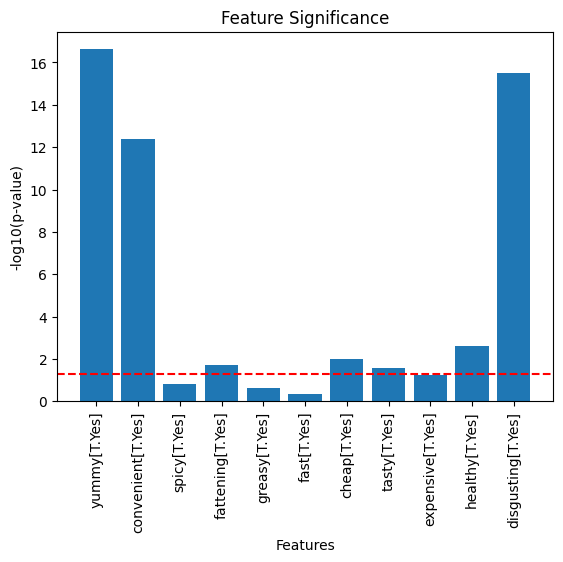

In [22]:
# Using Mixtures of Regression Models
import statsmodels.formula.api as smf
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn import preprocessing
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

# Reverse the table of 'Like'
like_counts = mcdonalds['Like'].value_counts()
print(like_counts[::-1])

# Define a function to extract numeric values from strings
import re
def extract_numeric(value):
    numeric_part = re.findall(r'\d+', str(value))
    if numeric_part:
        return int(numeric_part[0])
    else:
        return None

# Apply the function to the 'Like' column
mcdonalds['Like'] = mcdonalds['Like'].apply(extract_numeric)

# Subtract from 6 to reverse the ratings
mcdonalds['Like'] = 6 - mcdonalds['Like']

print(mcdonalds['Like'].value_counts())

# Create formula string
features = "+".join(mcdonalds.columns[:11])
formula = f"Like ~ {features}"
print(formula)

# Fit the model using GaussianMixture
np.random.seed(1234)

# Define the formula and fit the linear regression model
model = smf.ols(formula, data=mcdonalds).fit()

# Extracting the dependent and independent variables for Gaussian Mixture
X = mcdonalds[mcdonalds.columns[:11]]
y = mcdonalds['Like']

# One-hot encode categorical variables using pandas get_dummies function
X = pd.get_dummies(X)

# Replace non-numeric values in your dataframe with NaN and convert to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Standardizing the features
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled, y)

# Getting the labels and creating a new model with the cluster assignments
labels = gmm.predict(X_scaled)
mcdonalds['cluster'] = labels

# Refitting the model
refitted_model = smf.ols(formula, data=mcdonalds).fit()

# Summary of the refitted model
print(refitted_model.summary())

# Plotting the model significance (p-values)
pvalues = refitted_model.pvalues[1:]  # exclude intercept
plt.bar(pvalues.index, -np.log10(pvalues))
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.title('Feature Significance')
plt.xticks(rotation=90)
plt.show()

**A.6 Step 6: Profiling Segments**

<ipython-input-20-02ca36c1b943>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


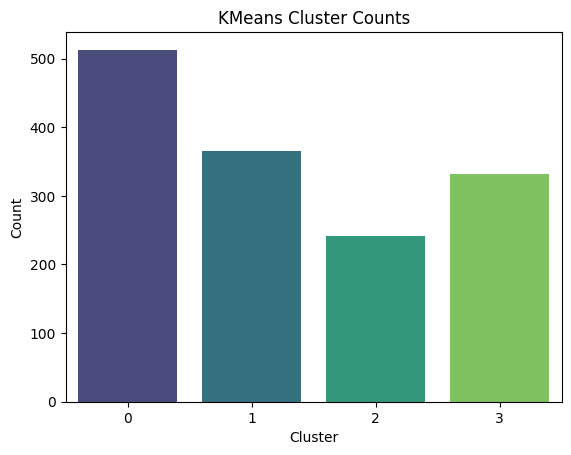

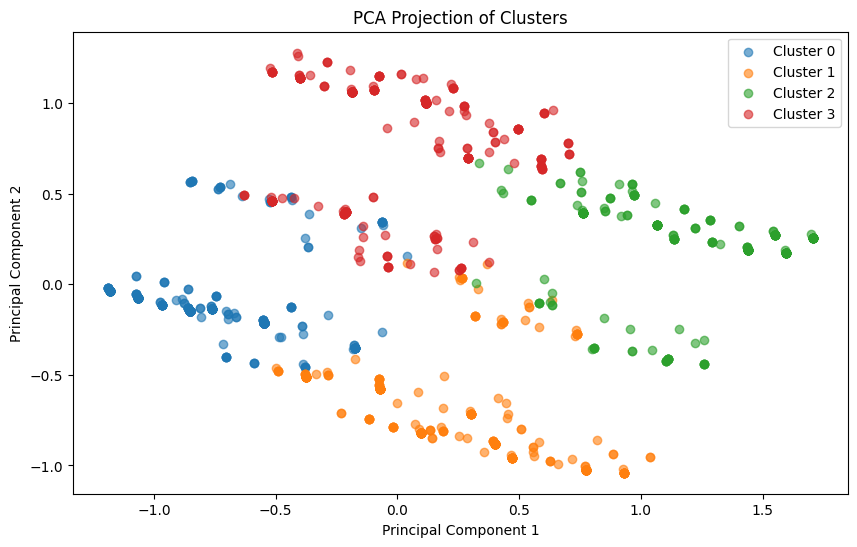

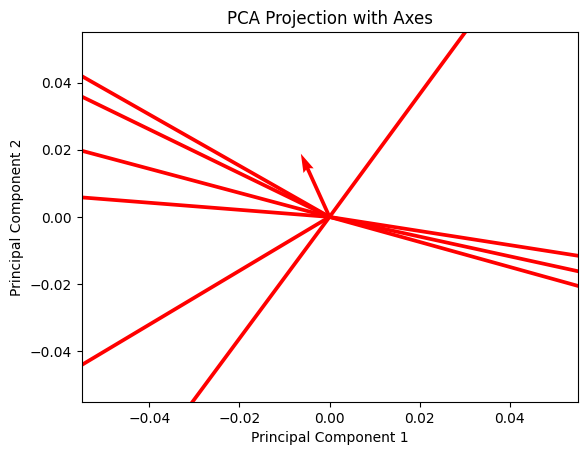

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering on the transposed dataset
MD_dist = np.transpose(MD_x)
MD_vclust = linkage(MD_dist, method='ward')

# Perform KMeans clustering with 4 clusters (MD.k4 equivalent)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x)

# Create a bar chart with the cluster assignments
# Using seaborn for shaded bar chart
cluster_counts = pd.Series(MD_k4).value_counts()
cluster_counts = cluster_counts.reindex(range(4), fill_value=0)
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('KMeans Cluster Counts')
plt.show()

# Plot PCA projection
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

plt.figure(figsize=(10, 6))
for cluster in np.unique(MD_k4):
    indices = np.where(MD_k4 == cluster)
    plt.scatter(MD_pca[indices, 0], MD_pca[indices, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Clusters')
plt.legend()
plt.show()

# Adding projection axes (component directions)
components = pca.components_
plt.quiver(np.zeros(components.shape[1]), np.zeros(components.shape[1]),
           components[0, :], components[1, :],
           angles='xy', scale_units='xy', scale=1, color='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Axes')
plt.show()

**A.7 Step 7: Describing Segments**

<Figure size 800x600 with 0 Axes>

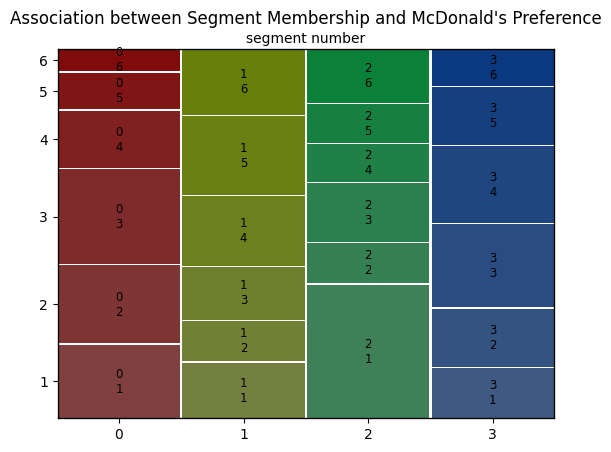

<Figure size 800x600 with 0 Axes>

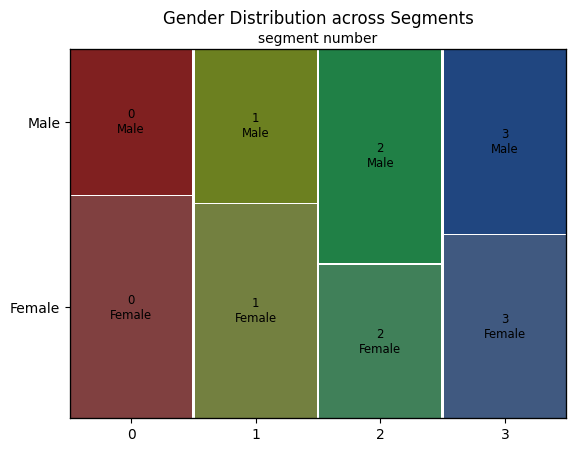

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Step 7: Describing Segments

# Mosaic plot for association between segment membership and loving or hating McDonald’s
plt.figure(figsize=(8, 6))
mosaic(pd.crosstab(MD_k4, mcdonalds['Like']).apply(lambda r: r/r.sum(), axis=1).stack(), title='Association between Segment Membership and McDonald\'s Preference')
plt.xlabel('segment number')
plt.show()

# Mosaic plot for gender distribution across segments
plt.figure(figsize=(8, 6))
mosaic(pd.crosstab(MD_k4, mcdonalds['Gender']).apply(lambda r: r/r.sum(), axis=1).stack(), title='Gender Distribution across Segments')
plt.xlabel('segment number')
plt.show()


**A.8 Step 8: Selecting (the) Target Segment(s)**

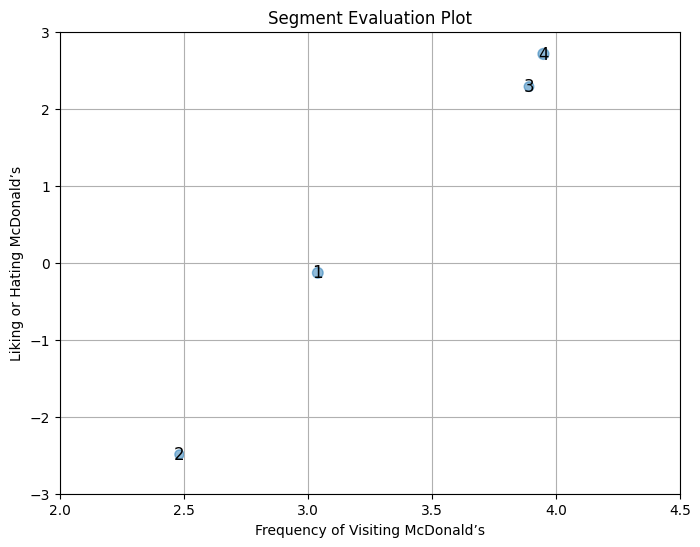

In [50]:
import matplotlib.pyplot as plt
import numpy as np

visit = np.array([3.040426, 2.482490, 3.891975, 3.950249])
like = np.array([-0.1319149, -2.4902724, 2.2870370, 2.7114428])
female = np.array([0.5851064, 0.4319066, 0.4783951, 0.6144279])

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=100*female, alpha=0.5)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Frequency of Visiting McDonald’s')
plt.ylabel('Liking or Hating McDonald’s')
plt.title('Segment Evaluation Plot')

# Add text labels for each segment
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], str(txt), fontsize=12, ha='center', va='center')

plt.grid(True)
plt.show()


**A.9 Step 9: Customising the Marketing Mix & A.10 Step 10: Evaluation and Monitoring**

In Step 9 of customizing the marketing mix, McDonald’s could focus on segment 3 (young customers who like McDonald’s but find it expensive) by introducing a distinct MCSUPERBUDGET line to meet their price expectations (Price). This approach aims to build loyalty among these customers, who may later transition to regular products as their income increases. To avoid cannibalizing the main product line, the MCSUPERBUDGET range would feature different products (Product). Targeted communication channels would promote this line (Promotion), while the same outlets would be used for distribution (Place), potentially with a separate MCSUPERBUDGET queue. Continuous evaluation and market monitoring are crucial to adapt to changing customer needs and market dynamics.
